In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import uproot
import awkward as ak
import glob
import mplhep as hep
hep.style.use("CMS")
from functions import loadMultiParquet, getXSectionBR
import os

In [36]:
nReal = 900
nMC = -1
paths = [
            "/pnfs/psi.ch/cms/trivcat/store/user/gcelotto/bb_ntuples/flatForGluGluHToBB/Data1A/others/",
            "/pnfs/psi.ch/cms/trivcat/store/user/gcelotto/bb_ntuples/flatForGluGluHToBB/GluGluHToBB/others/",
            "/pnfs/psi.ch/cms/trivcat/store/user/gcelotto/bb_ntuples/flatForGluGluHToBB/ZJets/ZJetsToQQ_HT-100to200",
            "/pnfs/psi.ch/cms/trivcat/store/user/gcelotto/bb_ntuples/flatForGluGluHToBB/ZJets/ZJetsToQQ_HT-200to400",
            "/pnfs/psi.ch/cms/trivcat/store/user/gcelotto/bb_ntuples/flatForGluGluHToBB/ZJets/ZJetsToQQ_HT-400to600",
            "/pnfs/psi.ch/cms/trivcat/store/user/gcelotto/bb_ntuples/flatForGluGluHToBB/ZJets/ZJetsToQQ_HT-600to800",
            "/pnfs/psi.ch/cms/trivcat/store/user/gcelotto/bb_ntuples/flatForGluGluHToBB/ZJets/ZJetsToQQ_HT-800toInf",
            #"/pnfs/psi.ch/cms/trivcat/store/user/gcelotto/bb_ntuples/flatForGluGluHToBB/VBFHToBB"
            ]
dfs, numEventsList, fileNumberList = loadMultiParquet(paths=paths, nReal=nReal, nMC=nMC, columns=['sf', 'dijet_mass', 'jet1_pt', 'jet2_pt', 'twoTrigMuons','sumMuonsCharge', 'jet2_eta', 'muon2_eta', 'muon_eta', 'jet1_eta', 'dimuon_mass'], returnNumEventsTotal=True, selectFileNumberList=None, returnFileNumberList=True)

Found 1005 files for process 0
900 files for process 0


Found 154 files for process 1
154 files for process 1


Found 1623 files for process 2
1623 files for process 2


Found 162 files for process 3
162 files for process 3


Found 249 files for process 4
249 files for process 4


Found 241 files for process 5
241 files for process 5


Found 210 files for process 6
210 files for process 6


lenght of elements returned in fileNumberList
[900, 154, 1623, 162, 249, 241, 210]


In [37]:
W = dfs[0].sf
W_H = dfs[1].sf*getXSectionBR()/numEventsList[1]*nReal*0.774/1017*1000
W_1 = 5.261e+03/numEventsList[2]*dfs[2].sf*nReal*0.774/1017*1000
W_2 = 1012./numEventsList[3]*dfs[3].sf*nReal*0.774/1017*1000
W_3 = 114.2/numEventsList[4]*dfs[4].sf*nReal*0.774/1017*1000
W_4 = 25.34/numEventsList[5]*dfs[5].sf*nReal*0.774/1017*1000
W_5 = 12.99/numEventsList[6]*dfs[6].sf*nReal*0.774/1017*1000
dfs = [dfs[0], dfs[1], pd.concat(dfs[2:])]

W_Z = np.concatenate([W_1, W_2, W_3, W_4, W_5])

In [38]:
#filePathSignal = "/pnfs/psi.ch/cms/trivcat/store/user/gcelotto/bb_ntuples/flatForGluGluHToBB/GluGluHToBB"
#fileNamesSignal = glob.glob(filePathSignal+"/*.parquet")
#filePathZBos = "/pnfs/psi.ch/cms/trivcat/store/user/gcelotto/bb_ntuples/flatForGluGluHToBB/ZJets/ZJetsToQQ_HT-200to400"
#fileNamesZBos = glob.glob(filePathZBos+"/*.parquet")
#dataFile = glob.glob("/pnfs/psi.ch/cms/trivcat/store/user/gcelotto/bb_ntuples/flatForGluGluHToBB/Data1A/*.parquet")
#dfSignal = pd.read_parquet(fileNamesSignal)
#dfData = pd.read_parquet(dataFile)
#dfZBos = pd.read_parquet(fileNamesZBos)



#c = np.histogram(dfZBos.twoTrigMuons, bins=bins)[0]
#c= c/np.sum(c)
#ax.hist(bins[:-1], bins=bins, weights=c, histtype=u'step', label='ZJets200-400', color='green')
#for id, count in enumerate(c):
#    ax.text(x=bins[id]+0.25, y=0.4, s="%.2f %%"%(count*100), color='green', fontsize=12)
#ax.set_xlabel("Two Jets with Muons", fontsize=18)
#ax.legend()

/tmp/ipykernel_63478/2272193189.py:3: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  c = np.histogram(dfs[1].twoTrigMuons, bins=bins, weights=W_H)[0]
/tmp/ipykernel_63478/2272193189.py:9: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  c = np.histogram(dfs[0].twoTrigMuons, bins=bins)[0]
/tmp/ipykernel_63478/2272193189.py:15: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  c = np.histogram(dfs[2].twoTrigMuons, bins=bins, weights=W_Z)[0]


(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Simulation'),
 supptext: Custom Text(1.012, 1, ''))

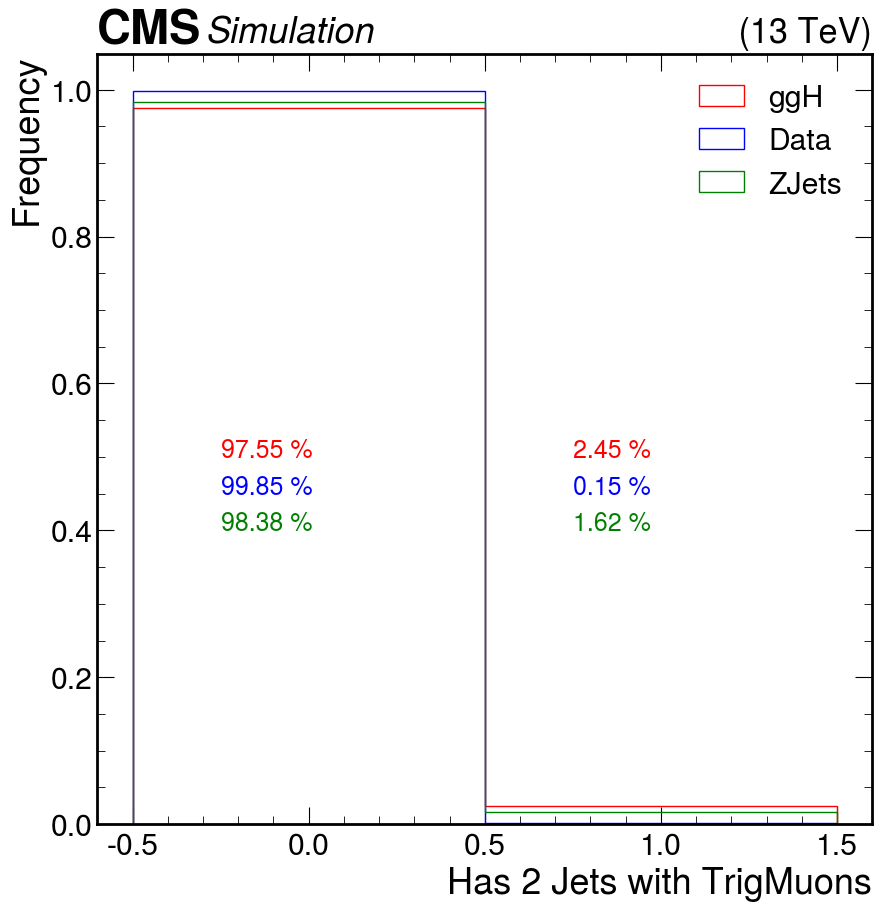

In [39]:
fig, ax = plt.subplots(1, 1)
bins=np.linspace(-0.5, 1.5, 3)
c = np.histogram(dfs[1].twoTrigMuons, bins=bins, weights=W_H)[0]
c= c/np.sum(c)
ax.hist(bins[:-1], bins=bins, weights=c, histtype=u'step', label='ggH', color='red')
for id, count in enumerate(c):
    ax.text(x=bins[id]+0.25, y=0.5, s="%.2f %%"%(count*100), color='red', fontsize=18)

c = np.histogram(dfs[0].twoTrigMuons, bins=bins)[0]
c= c/np.sum(c)
ax.hist(bins[:-1], bins=bins, weights=c, histtype=u'step', label='Data', color='blue')
for id, count in enumerate(c):
    ax.text(x=bins[id]+0.25, y=0.45, s="%.2f %%"%(count*100), color='blue', fontsize=18)

c = np.histogram(dfs[2].twoTrigMuons, bins=bins, weights=W_Z)[0]
c= c/np.sum(c)
ax.hist(bins[:-1], bins=bins, weights=c, histtype=u'step', label='ZJets', color='green')
for id, count in enumerate(c):
    ax.text(x=bins[id]+0.25, y=0.4, s="%.2f %%"%(count*100), color='green', fontsize=18)
ax.legend()
ax.set_xlabel("Has 2 Jets with TrigMuons")
ax.set_ylabel("Frequency")
hep.cms.label()

(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Simulation'),
 supptext: Custom Text(1.012, 1, ''))

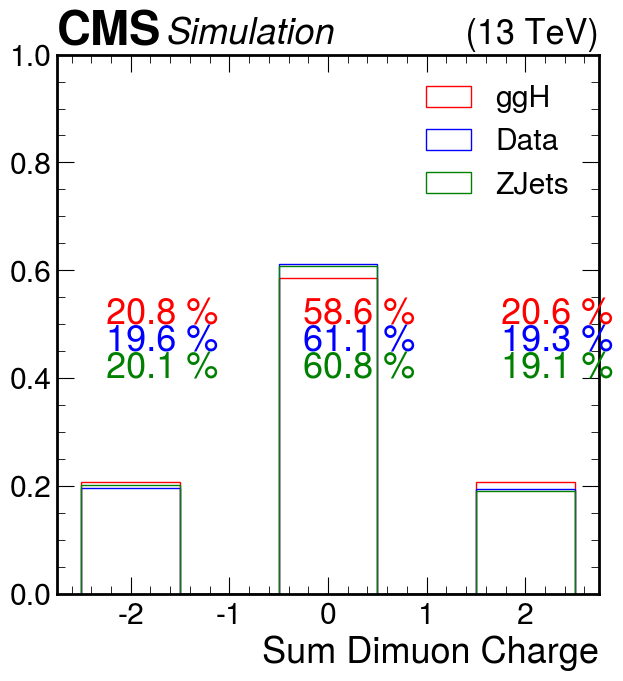

In [40]:
fig, ax = plt.subplots(1, 1, figsize=(7,7))
m = dfs[1].twoTrigMuons==True
bins=np.linspace(-2.5, 2.5, 6)
c=np.histogram(dfs[1][m].sumMuonsCharge, bins=bins, weights=W_H[m])[0]
c=c/np.sum(c)
ax.hist(bins[:-1], bins=bins, weights=c, histtype=u'step', color='red', label='ggH')
for id, count in enumerate(c):
    if count==0:
        continue
    ax.text(x=bins[id]+0.25, y=0.5, s="%.1f %%"%(count*100), color='red')
ax.set_xlabel("Sum Dimuon Charge")


m = dfs[0].twoTrigMuons==True
c=np.histogram(dfs[0][m].sumMuonsCharge, bins=bins, weights=dfs[0][m].sf)[0]
c=c/np.sum(c)
ax.hist(bins[:-1], bins=bins, weights=c, histtype=u'step', color='blue', label='Data')
for id, count in enumerate(c):
    if count==0:
        continue
    ax.text(x=bins[id]+0.25, y=0.45, s="%.1f %%"%(count*100), color='blue')
ax.legend()
ax.set_ylim(0, 1)


m = dfs[2].twoTrigMuons==True
c=np.histogram(dfs[2][m].sumMuonsCharge, bins=bins, weights=W_Z[m])[0]
c=c/np.sum(c)
ax.hist(bins[:-1], bins=bins, weights=c, histtype=u'step', color='green', label='ZJets')
for id, count in enumerate(c):
    if count==0:
        continue
    ax.text(x=bins[id]+0.25, y=0.4, s="%.1f %%"%(count*100), color='green')
ax.legend()
ax.set_ylim(0, 1)

hep.cms.label()



0.00029937736931288217
0.0061592452770441305


(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Simulation'),
 supptext: Custom Text(1.012, 1, ''))

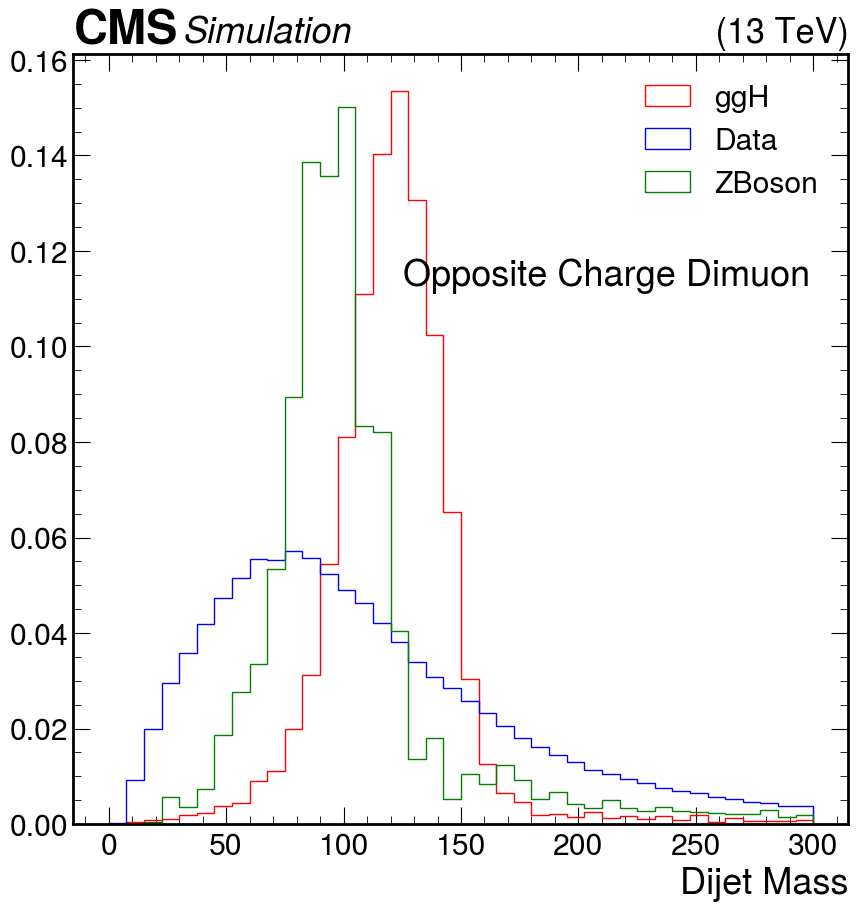

In [41]:
dimuonCharge = 0

fig, ax = plt.subplots(1, 1)
mH = (dfs[1].twoTrigMuons==True) & abs((dfs[1].sumMuonsCharge)==dimuonCharge)
bins=np.linspace(0, 300, 41)
c=np.histogram(dfs[1][mH].dijet_mass, bins=bins, weights=W_H[mH])[0]
c=c/np.sum(c)
ax.hist(bins[:-1], bins=bins, weights=c, histtype=u'step', color='red', label='ggH')



mD = (dfs[0].twoTrigMuons==True) & (abs(dfs[0].sumMuonsCharge)==dimuonCharge)
c=np.histogram(dfs[0][mD].dijet_mass, bins=bins)[0]
c=c/np.sum(c)
ax.hist(bins[:-1], bins=bins, weights=c, histtype=u'step', color='blue', label='Data')

mZ = (dfs[2].twoTrigMuons==True) & (abs(dfs[2].sumMuonsCharge)==dimuonCharge)
c=np.histogram(dfs[2][mZ].dijet_mass, bins=bins, weights=W_Z[mZ])[0]
c=c/np.sum(c)
ax.hist(bins[:-1], bins=bins, weights=c, histtype=u'step', color='green', label='ZBoson')

ax.set_xlabel("Dijet Mass")
ax.legend()

# HIGGS
num = np.sum(W_H[(mH) &(dfs[1].dijet_mass <150)&(dfs[1].dijet_mass >100)])
den = len(dfs[0][(mD) & (dfs[0].dijet_mass <150)&(dfs[0].dijet_mass >100)])
print(num/den)
#ax.text(x=0.9, y=0.5, s="H-Sig : %.2f"%(num/np.sqrt(den) * np.sqrt(1017/nReal) * np.sqrt(41.6/0.774)), transform=ax.transAxes, ha='right')

# Z BOSON
num = np.sum(W_Z[(mZ) &(dfs[2].dijet_mass <120)&(dfs[2].dijet_mass >60)])
den = len(dfs[0][(mD) & (dfs[0].dijet_mass <120)&(dfs[0].dijet_mass >60)])
print(num/den)

if dimuonCharge==2:
    s="Same Charge Dimuon"
elif dimuonCharge==0:
    s="Opposite Charge Dimuon"
ax.text(x=0.95, y =0.7, s=s, ha='right', transform=ax.transAxes)
hep.cms.label()
#ax.text(x=0.9, y=0.4, s="Z-Sig : %.2f"%(num/np.sqrt(den) * np.sqrt(1017/nReal) * np.sqrt(41.6/0.774)), transform=ax.transAxes, ha='right')


0.00016278644553750917
0.006113705787831937


(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Simulation'),
 supptext: Custom Text(1.012, 1, ''))

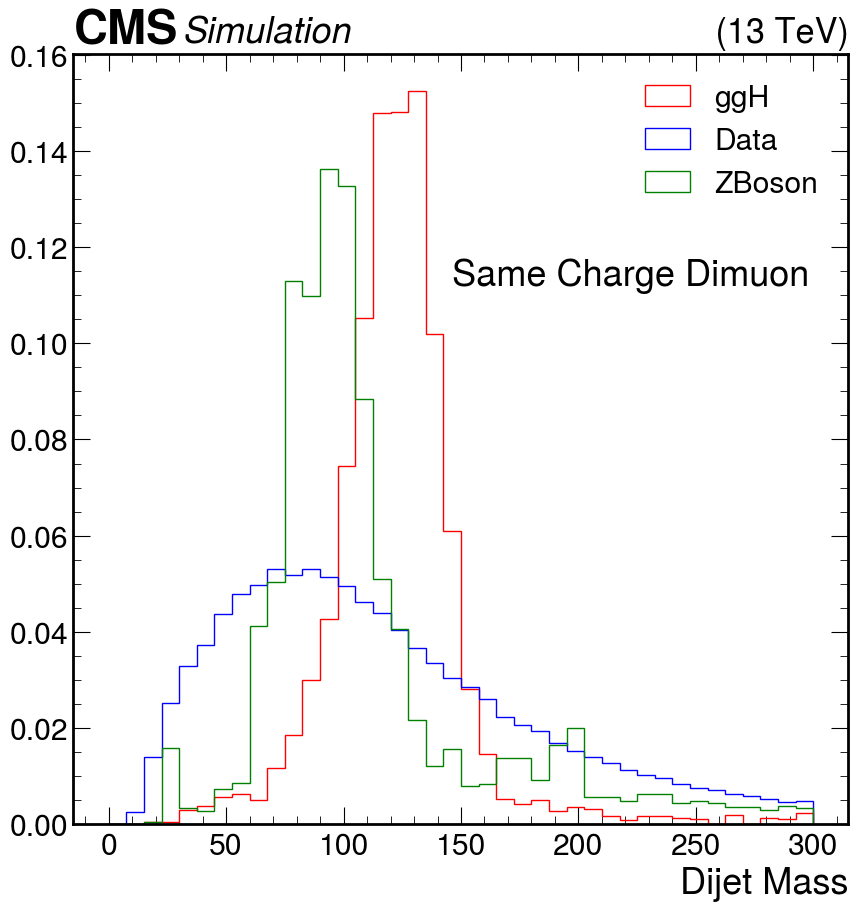

In [42]:
dimuonCharge = 2

fig, ax = plt.subplots(1, 1)
mH = (dfs[1].twoTrigMuons==True) & abs((dfs[1].sumMuonsCharge)==dimuonCharge)
bins=np.linspace(0, 300, 41)
c=np.histogram(dfs[1][mH].dijet_mass, bins=bins, weights=W_H[mH])[0]
c=c/np.sum(c)
ax.hist(bins[:-1], bins=bins, weights=c, histtype=u'step', color='red', label='ggH')



mD = (dfs[0].twoTrigMuons==True) & (abs(dfs[0].sumMuonsCharge)==dimuonCharge)
c=np.histogram(dfs[0][mD].dijet_mass, bins=bins)[0]
c=c/np.sum(c)
ax.hist(bins[:-1], bins=bins, weights=c, histtype=u'step', color='blue', label='Data')

mZ = (dfs[2].twoTrigMuons==True) & (abs(dfs[2].sumMuonsCharge)==dimuonCharge)
c=np.histogram(dfs[2][mZ].dijet_mass, bins=bins, weights=W_Z[mZ])[0]
c=c/np.sum(c)
ax.hist(bins[:-1], bins=bins, weights=c, histtype=u'step', color='green', label='ZBoson')

ax.set_xlabel("Dijet Mass")
ax.legend()

# HIGGS
num = np.sum(W_H[(mH) &(dfs[1].dijet_mass <150)&(dfs[1].dijet_mass >100)])
den = len(dfs[0][(mD) & (dfs[0].dijet_mass <150)&(dfs[0].dijet_mass >100)])
print(num/den)
#ax.text(x=0.9, y=0.5, s="H-Sig : %.2f"%(num/np.sqrt(den) * np.sqrt(1017/nReal) * np.sqrt(41.6/0.774)), transform=ax.transAxes, ha='right')

# Z BOSON
num = np.sum(W_Z[(mZ) &(dfs[2].dijet_mass <120)&(dfs[2].dijet_mass >60)])
den = len(dfs[0][(mD) & (dfs[0].dijet_mass <120)&(dfs[0].dijet_mass >60)])
print(num/den)

if dimuonCharge==2:
    s="Same Charge Dimuon"
elif dimuonCharge==0:
    s="Opposite Charge Dimuon"
ax.text(x=0.95, y =0.7, s=s, ha='right', transform=ax.transAxes)
hep.cms.label()
#ax.text(x=0.9, y=0.4, s="Z-Sig : %.2f"%(num/np.sqrt(den) * np.sqrt(1017/nReal) * np.sqrt(41.6/0.774)), transform=ax.transAxes, ha='right')


Text(1, 0, 'Jet eta - muon Eta')

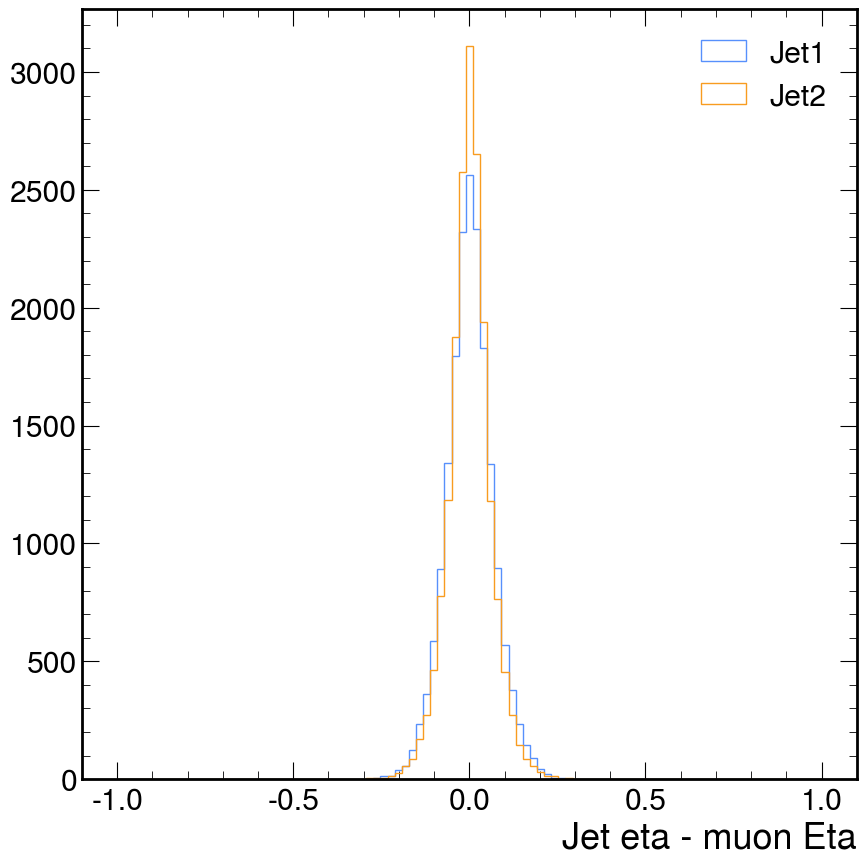

In [43]:
dfs[1][dfs[1].twoTrigMuons==True][['muon2_eta', 'jet2_eta', 'muon_eta', 'jet1_eta']]
fig, ax =plt.subplots(1, 1)

ax.hist(dfs[1][dfs[1].twoTrigMuons==True].muon2_eta - dfs[1][dfs[1].twoTrigMuons==True].jet2_eta, bins=np.linspace(-1, 1, 100), histtype=u'step', label='Jet1')
ax.hist(dfs[1][dfs[1].twoTrigMuons==True].muon_eta - dfs[1][dfs[1].twoTrigMuons==True].jet1_eta, bins=np.linspace(-1, 1, 100), histtype=u'step', label='Jet2')
ax.legend()
ax.set_xlabel("Jet eta - muon Eta")


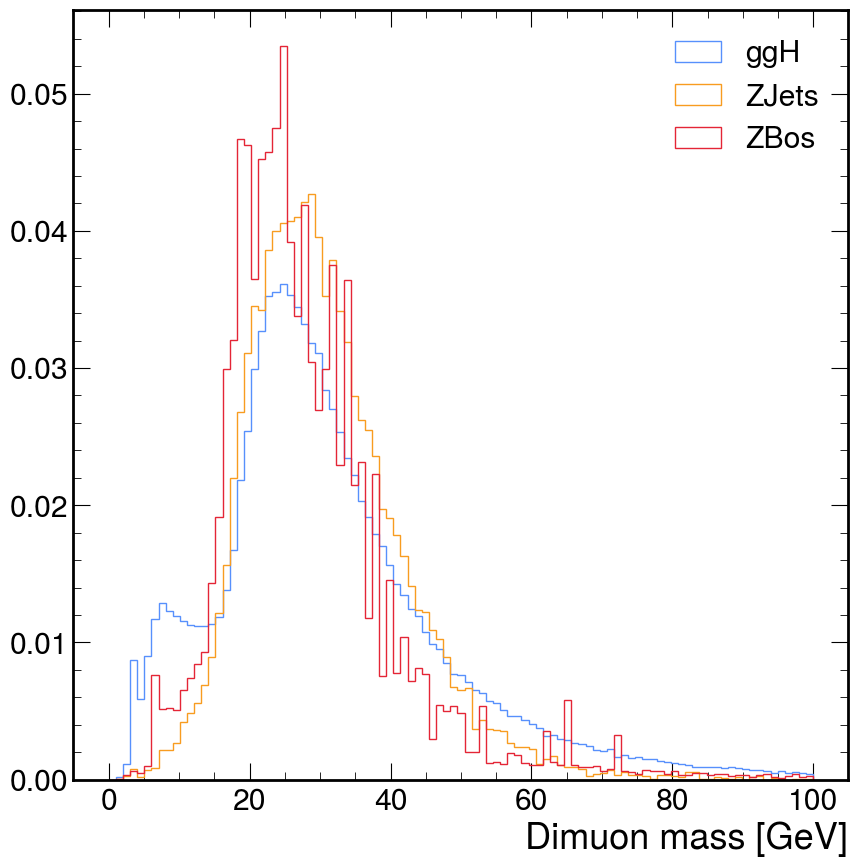

In [44]:
fig, ax = plt.subplots(1, 1)
#dfs = [dfs[0], pd.concat(dfs[1:])]
ax.hist(dfs[0].dimuon_mass, bins=np.linspace(0, 100, 100), histtype=u'step', label='ggH', density=True)
ax.hist(dfs[1].dimuon_mass, bins=np.linspace(0, 100, 100), weights=W_H,histtype=u'step', label='ZJets', density=True)
ax.hist(dfs[2].dimuon_mass, bins=np.linspace(0, 100, 100), weights=W_Z, histtype=u'step', label='ZBos', density=True)
ax.set_xlabel("Dimuon mass [GeV]")
ax.legend()